WeatherPy

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat an lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

Perform API Calls

In [3]:
# Save url configuration
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# See API layout
test_query = f"{url}q={city}&appid={weather_api}&units={units}"
test_response = requests.get(test_query)
test_json_response = test_response.json()
print(json.dumps(test_json_response, indent=4))

{
    "coord": {
        "lon": -73.414,
        "lat": 41.3712
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 74.23,
        "feels_like": 75.29,
        "temp_min": 70.48,
        "temp_max": 78.03,
        "pressure": 1020,
        "humidity": 84
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.55,
        "deg": 192,
        "gust": 23.8
    },
    "clouds": {
        "all": 100
    },
    "dt": 1624755075,
    "sys": {
        "type": 2,
        "id": 2004826,
        "country": "US",
        "sunrise": 1624699312,
        "sunset": 1624753864
    },
    "timezone": -14400,
    "id": 5282297,
    "name": "Bethel",
    "cod": 200
}


In [4]:
# Set empty lists to hold Temperature, Humidity, Cloudiness, Wind Speed, & Latitude
name = []
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
country = []
date = []

# Create starting point for record count
record_count = 0

# Print beginning text
print(f"Beginning Data Retrieval")
print(f"-------------------------")


# Loop through each city
for city in cities:

    # Create search query, make reqeust and store in json
    query_url = f"{url}q={city}&appid={weather_api}&units={units}"
    response = requests.get(query_url)
    json_response = response.json()
    
    # Add to record count
    record_count = record_count + 1

    # Try to grab data if available in API
    try:
        name.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])               
        lng.append(json_response["coord"]["lon"])               
        temp.append(json_response["main"]["temp_max"])
        humid.append(json_response["main"]["humidity"])
        cloud.append(json_response["clouds"]["all"])
        wind.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        print(f"Processing Record {record_count}: {city}")
    
        

    # Handle exceptions for a city that is not available in SPI
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

print(f"-------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1: komsomolskiy
Processing Record 2: hambantota
Processing Record 3: fort-shevchenko
Processing Record 4: bintulu
Processing Record 5: vaini
Processing Record 6: mitu
Processing Record 7: mushie
Processing Record 8: arraial do cabo
Processing Record 9: yellowknife
Processing Record 10: xinxiang
Processing Record 11: kaeo
Processing Record 12: bogalusa
Processing Record 13: glencoe
Processing Record 14: pevek
Processing Record 15: atuona
Processing Record 16: khatanga
City not found. Skipping...
Processing Record 18: usinsk
City not found. Skipping...
Processing Record 20: ossora
Processing Record 21: castro
Processing Record 22: kashiwazaki
Processing Record 23: sao joao da barra
Processing Record 24: sadiqabad
Processing Record 25: new norfolk
City not found. Skipping...
Processing Record 27: jamestown
Processing Record 28: gambo
Processing Record 29: rikitea
Processing Record 30: hobart
City not found. Skipping...
P

Convert Raw Data to DataFrame

In [6]:
# Create new dataframe 
cities_df = pd.DataFrame({"City": name, "Latitude": lat, "Longitude": lng, "Max Temperature": temp, "Humidity": humid, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date})
cities_df.to_csv("output_data/cities.csv")

# Convert date column from unix
cities_df["Date"] = pd.to_datetime(cities_df["Date"], unit="s", origin="unix")

# Prview new dataframe
cities_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yangi Marg`ilon,40.4272,71.7189,69.22,37,4,6.91,UZ,2021-06-27 00:51:15
1,Hambantota,6.1241,81.1185,75.54,100,20,5.75,LK,2021-06-27 00:51:16
2,Fort-Shevchenko,44.5086,50.2630,85.33,39,98,14.27,KZ,2021-06-27 00:51:16
3,Bintulu,3.1667,113.0333,75.61,100,40,3.44,MY,2021-06-27 00:51:17
4,Vaini,-21.2000,-175.2000,75.36,73,20,13.80,TO,2021-06-27 00:51:17


In [7]:
# Describe new dataframe to see if there are any cities with humidity greater than 100%
cities_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,20.190468,16.680267,69.058204,71.258803,54.198944,7.041708
std,33.102335,91.774369,14.160396,20.524041,40.221620,4.929835
min,-54.800000,-179.166700,24.280000,7.000000,0.000000,0.000000
25%,-6.550575,-63.578950,59.122500,61.750000,11.000000,3.440000
50%,24.833300,19.383900,71.560000,76.000000,58.000000,5.990000
75%,48.723550,93.779175,79.720000,86.000000,99.000000,9.355000
max,78.218600,179.316700,111.040000,100.000000,100.000000,33.580000


In [8]:
# Confirm there are no rows with humdity greater than 100%
cities_df.loc[cities_df["Humidity"]>100]

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Save to csv
cities_df.to_csv("output_data/clean_weather.csv")

Plotting the Data

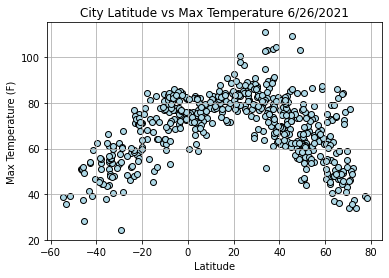

This plot shows the correlation between a cities latitide and its max temperature.
The closer you get to the equater (Latitude 0) the warmer the temperature is.


<Figure size 432x288 with 0 Axes>

In [10]:
# Create plot for Latitude vs Temperature
plt.title("City Latitude vs Max Temperature 6/26/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(cities_df["Latitude"], cities_df["Max Temperature"], marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.show()
print("This plot shows the correlation between a cities latitide and its max temperature.")
print("The closer you get to the equater (Latitude 0) the warmer the temperature is.")
plt.savefig("output_data/Fig01.png")

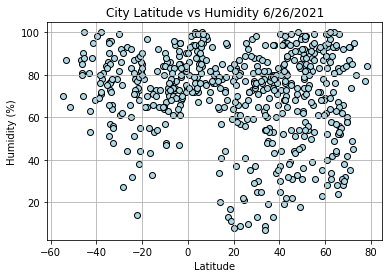

This plot shows the correlation between a cities latitide and its humidity.
Aside from the lowest humdity being around the 20-40 latitude area, there isn't much correlation.


<Figure size 432x288 with 0 Axes>

In [11]:
# Create plot for Latitude vs Humidity
plt.title("City Latitude vs Humidity 6/26/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.show()
print("This plot shows the correlation between a cities latitide and its humidity.")
print("Aside from the lowest humdity being around the 20-40 latitude area, there isn't much correlation.")
plt.savefig("output_data/Fig02.png")

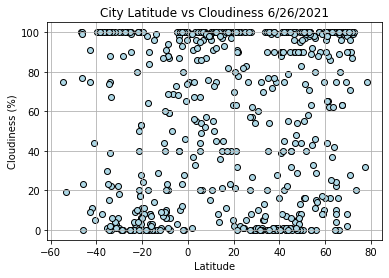

This plot shows the correlation between a cities latitide and its cloudiness.
There does not seem to be any correlation between latitutde and cloudiness.


<Figure size 432x288 with 0 Axes>

In [105]:
# Create plot for Latitude vs Cloudiness
plt.title("City Latitude vs Cloudiness 6/26/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.show()
print("This plot shows the correlation between a cities latitide and its cloudiness.")
print("There does not seem to be any correlation between latitutde and cloudiness.")
plt.savefig("output_data/Fig03.png")

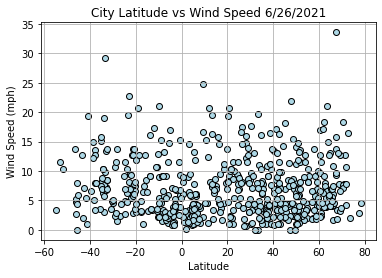

This plot shows the correlation between a cities latitide and its wind speed.
There are only a few instances where wind speeds are extremely high and there
doesn't seem to be a correlatin with latitude.


<Figure size 432x288 with 0 Axes>

In [12]:
# Create plot for Latitude vs Wind Speed
plt.title("City Latitude vs Wind Speed 6/26/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.show()
print("This plot shows the correlation between a cities latitide and its wind speed.")
print("There are only a few instances where wind speeds are extremely high and there")
print("doesn't seem to be a correlatin with latitude.")
plt.savefig("output_data/Fig04.png")

Linear Regression by Hemisphere

In [13]:
# Create new dataframes for North and South hemispheres
north_df = cities_df[cities_df["Latitude"]>=0]
south_df = cities_df[cities_df["Latitude"]<0]

The r-value is: -0.5717301977754685


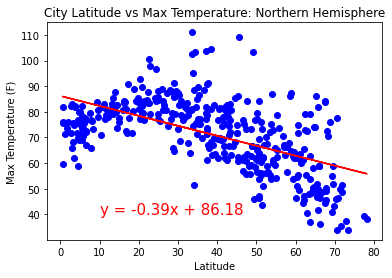

Similar to the first graph, this shows that the closer you get to the equator the warmer the temperature.
Although the highest temperatures beoong to those in the 25-40 latitude area.


<Figure size 432x288 with 0 Axes>

In [14]:
# Create plot for Latitude vs Temperature for NORTHERN HEMISPHERE
x_values = north_df["Latitude"]
y_values = north_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Max Temperature: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(north_df["Latitude"], north_df["Max Temperature"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("Similar to the first graph, this shows that the closer you get to the equator the warmer the temperature.")
print("Although the highest temperatures beoong to those in the 25-40 latitude area.")
plt.savefig("output_data/Fig05.png")

The r-value is: 0.801984450878695


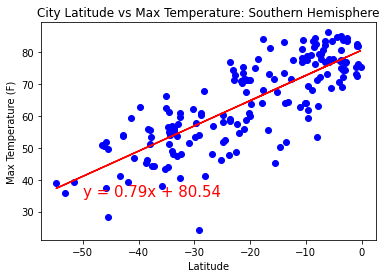

Again, the closer you get to the equator the warmer the temperature. Both hemispheres have strong correlations,
but the correlation in the southern hemisphere is greater as indicated by the greater r-value.


<Figure size 432x288 with 0 Axes>

In [15]:
# Create plot for Latitude vs Temperature for SOUTHERN HEMISPHERE
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Max Temperature: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(south_df["Latitude"], south_df["Max Temperature"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("Again, the closer you get to the equator the warmer the temperature. Both hemispheres have strong correlations,")
print("but the correlation in the southern hemisphere is greater as indicated by the greater r-value.")
plt.savefig("output_data/Fig06.png")

The r-value is: -0.12641796117725196


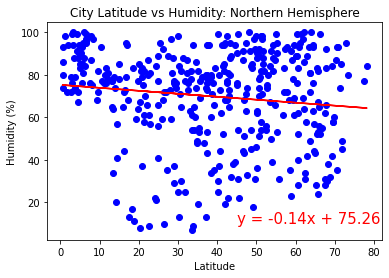

As shown by the r-value (close to 0) there is no correlation between the latitutde and humdiity for the Northern hemisphere.
There is a greater concentration of cities with humidity greater than 50%, but it is across all latitudes.


<Figure size 432x288 with 0 Axes>

In [16]:
# Create plot for Latitude vs Humidity for NORTHERN HEMISPHERE
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Humidity: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(north_df["Latitude"], north_df["Humidity"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("As shown by the r-value (close to 0) there is no correlation between the latitutde and humdiity for the Northern hemisphere.")
print("There is a greater concentration of cities with humidity greater than 50%, but it is across all latitudes.")
plt.savefig("output_data/Fig07.png")

The r-value is: -0.05738539889403326


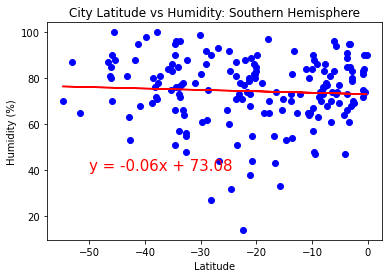

Though the r-value for the Southern hemisphere is greater than the Northern, 
there still is not a strong correlation between the latitude and humidity


<Figure size 432x288 with 0 Axes>

In [17]:
# Create plot for Latitude vs Humidity for SOUTHERN HEMISPHERE
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Humidity: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(south_df["Latitude"], south_df["Humidity"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("Though the r-value for the Southern hemisphere is greater than the Northern, ")
print("there still is not a strong correlation between the latitude and humidity")
plt.savefig("output_data/Fig08.png")

The r-value is: -0.02287480813109639


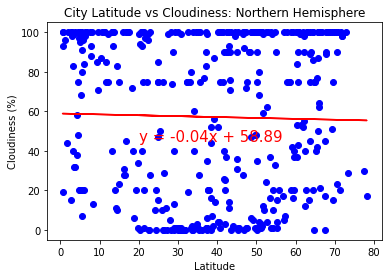

There seems to be a stronger concetration of cities in the extreme high and extreme low percentages.
of cloudiness, however no correlation to latitude.


<Figure size 432x288 with 0 Axes>

In [18]:
# Create plot for Latitude vs Cloudiness for NORTHERN HEMISPHERE
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Cloudiness: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(north_df["Latitude"], north_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("There seems to be a stronger concetration of cities in the extreme high and extreme low percentages.")
print("of cloudiness, however no correlation to latitude.")
plt.savefig("output_data/Fig09.png")

The r-value is: -0.12795907333923903


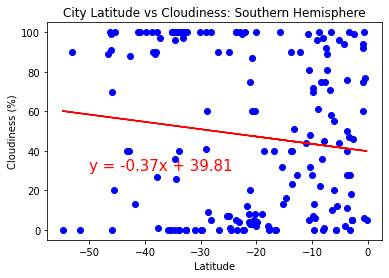

This plot shows the correlation between a cities latitide and its max temperature.


<Figure size 432x288 with 0 Axes>

In [19]:
# Create plot for Latitude vs Cloudiness for SOUTHERN HEMISPHERE
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Cloudiness: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(south_df["Latitude"], south_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("This plot shows the correlation between a cities latitide and its max temperature.")
plt.savefig("output_data/Fig10.png")

The r-value is: 0.06723515260107106


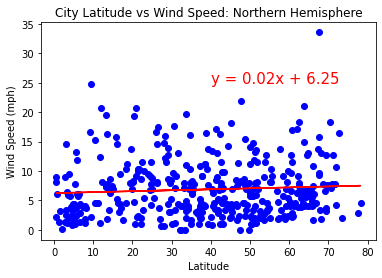

There are no very many places with high wind speed, however there is no
correlation between wind speed and latitutde.


<Figure size 432x288 with 0 Axes>

In [20]:
# Create plot for Latitude vs Wind Speed for NORTHERN HEMISPHERE
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Wind Speed: Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(north_df["Latitude"], north_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("There are no very many places with high wind speed, however there is no")
print("correlation between wind speed and latitutde.")
plt.savefig("output_data/Fig11.png")

The r-value is: -0.1862470075838355


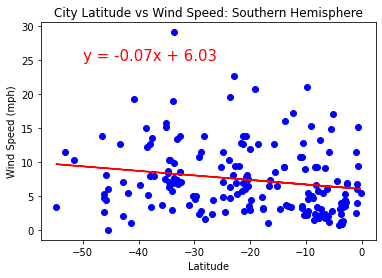

There is a greater correlation in the southern hemisphere between wind speed
and latitude, with the wind speeds picking up the further away you get from
the equator, but it's a weak correlation.


<Figure size 432x288 with 0 Axes>

In [22]:
# Create plot for Latitude vs Wind Speed for SOUTHERN HEMISPHERE
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs Wind Speed: Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(south_df["Latitude"], south_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()
print("There is a greater correlation in the southern hemisphere between wind speed")
print("and latitude, with the wind speeds picking up the further away you get from")
print("the equator, but it's a weak correlation.")
plt.savefig("output_data/Fig12.png")